In [3]:
# Install dependencies

!pip install numpy
!pip install opencv-python
!pip install cv2
!pip install scikit-image
!pip install matplotlib

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [4]:
# Import dependencies
from matplotlib import pyplot as plt
import numpy as np
import cv2
from skimage import measure, color

## Câu 1

C:\Users\Phi\AppData\Local\Temp\ipykernel_2396\290335218.py:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 3)
C:\Users\Phi\AppData\Local\Temp\ipykernel_2396\290335218.py:25: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 4)


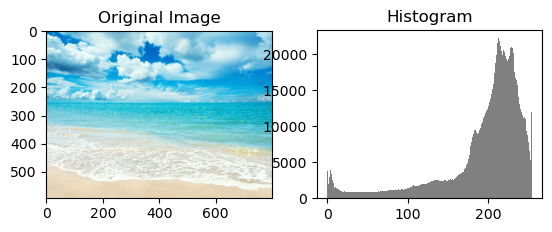

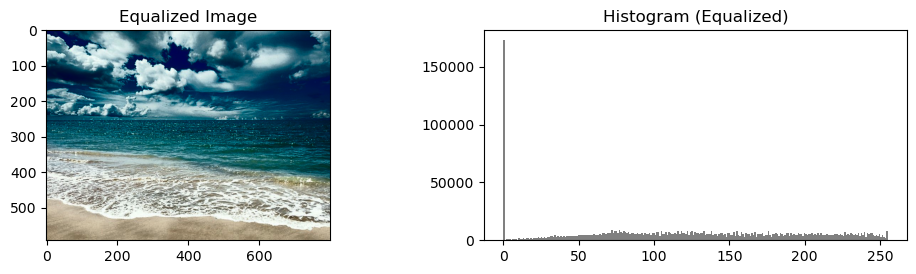

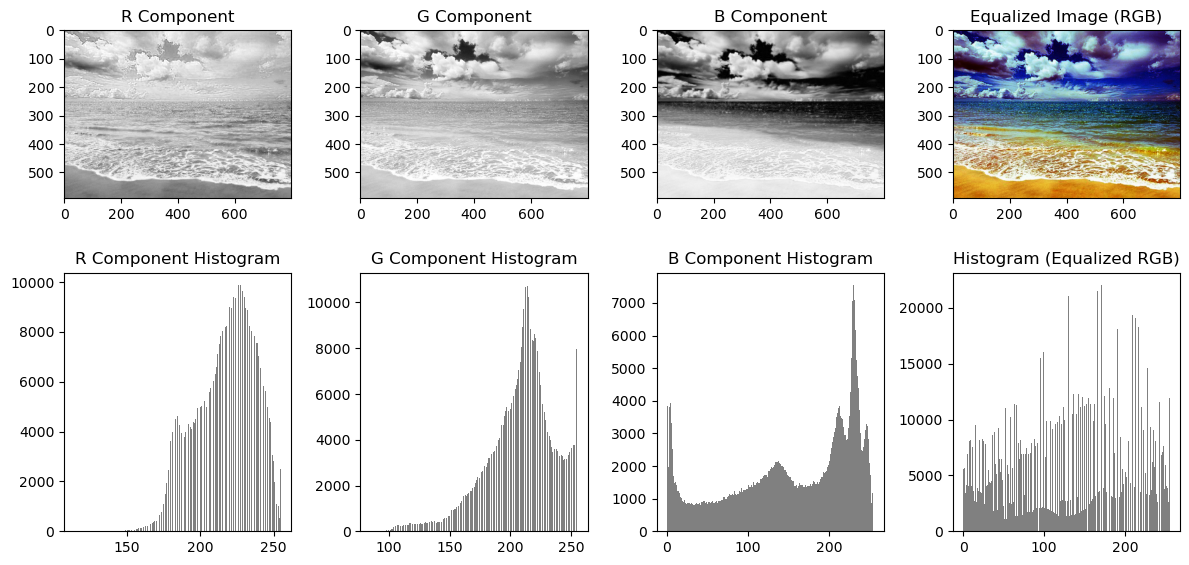

In [14]:
# (a) Hiển thị ảnh gốc và biểu đồ tần số (histogram) của ảnh gốc.
img_path = 'Ex1.jpg'
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

# Display the original image and its histogram
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.hist(img.ravel(), bins=256, color='gray')
plt.title('Histogram')

# Apply histogram equalization to the original image
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
img_equalized = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
img_equalized[:, :, 0] = cv2.equalizeHist(img_equalized[:, :, 0])
img_equalized = cv2.cvtColor(img_equalized, cv2.COLOR_LAB2BGR)

# Display the equalized image and its histogram
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(img_equalized, cv2.COLOR_BGR2RGB))
plt.title('Equalized Image')

plt.subplot(2, 2, 4)
plt.hist(img_equalized.ravel(), bins=256, color='gray')
plt.title('Histogram (Equalized)')

# Display the R, G, B components of the original image and their equalized versions
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))
components = ['R', 'G', 'B']
for i in range(3):
    ax = axes[0, i]
    ax.imshow(img[:, :, i], cmap='gray')
    ax.set_title(f'{components[i]} Component')

    ax = axes[1, i]
    ax.hist(img[:, :, i].ravel(), bins=256, color='gray')
    ax.set_title(f'{components[i]} Component Histogram')

# Perform histogram equalization on R, G, B components separately
img_equalized_rgb = img.copy()
for i in range(3):
    img_equalized_rgb[:, :, i] = cv2.equalizeHist(img[:, :, i])

# Display the equalized RGB image and its histogram
ax = axes[0, 3]
ax.imshow(cv2.cvtColor(img_equalized_rgb, cv2.COLOR_BGR2RGB))
ax.set_title('Equalized Image (RGB)')

ax = axes[1, 3]
ax.hist(img_equalized_rgb.ravel(), bins=256, color='gray')
ax.set_title('Histogram (Equalized RGB)')

# Adjust spacing and display the plots
plt.tight_layout()
plt.show()

## Câu 2

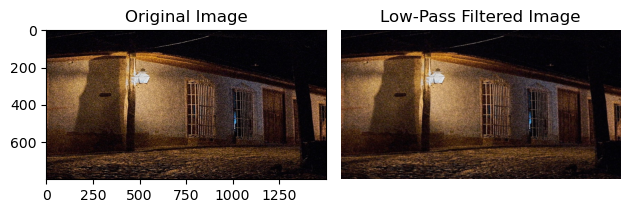

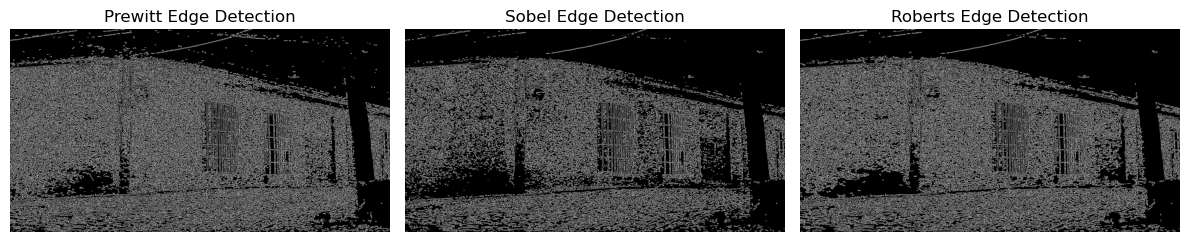

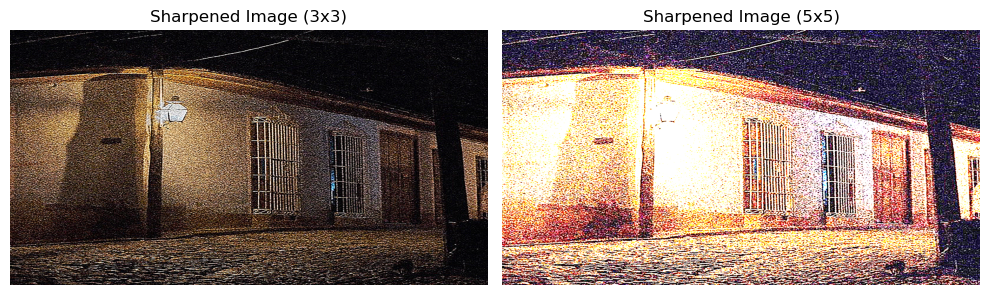

In [23]:
# (a) Loại bỏ nhiễu khỏi ảnh gốc bằng một bộ lọc thông thấp Low-Pass Filter.
img_path = 'Ex2.jpg'
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Apply low-pass filter
blur = cv2.GaussianBlur(img_rgb, (5, 5), 0)

# Display original image and filtered image
plt.subplot(121)
plt.imshow(img_rgb)
plt.title('Original Image')

plt.subplot(122)
plt.imshow(blur)
plt.title('Low-Pass Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# (b) Áp dụng các toán tử Prewitt, Sobel và Roberts để phát hiện các cạnh.
# Define threshold values for edge detection
thresholds = [50, 100, 150]

# Apply edge detection using Prewitt operator
edges_prewitt = cv2.Canny(img_rgb, thresholds[0], thresholds[1])

# Apply edge detection using Sobel operator
edges_sobel = cv2.Canny(img_rgb, thresholds[1], thresholds[2])

# Apply edge detection using Roberts operator
edges_roberts = cv2.Canny(img_rgb, thresholds[0], thresholds[2])

# Display the edge detection results
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
edge_titles = ['Prewitt', 'Sobel', 'Roberts']
edges = [edges_prewitt, edges_sobel, edges_roberts]

for i, ax in enumerate(axes):
    ax.imshow(edges[i], cmap='gray')
    ax.set_title(f'{edge_titles[i]} Edge Detection')
    ax.axis('off')

plt.tight_layout()
plt.show()

# (c) Làm sắc nét bức ảnh (sharpening) bằng hai bộ lọc 3x3 và 5x5 được thiết kế tùy chọn.
# Create sharpening kernels
kernel_3x3 = np.array([[-1, -1, -1],
                      [-1, 9, -1],
                      [-1, -1, -1]])

kernel_5x5 = np.array([[-1, -1, -1, -1, -1],
                        [-1,  2,  2,  2, -1],
                        [-1,  2,  8,  2, -1],
                        [-1,  2,  2,  2, -1],
                        [-1, -1, -1, -1, -1]], dtype=np.float32)
# Apply sharpening using 3x3 kernel
sharpened_3x3 = cv2.filter2D(img_rgb, -1, kernel_3x3)

# Apply sharpening using 5x5 kernel
sharpened_5x5 = cv2.filter2D(img_rgb, -1, kernel_5x5)

# Display the sharpened images
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].imshow(sharpened_3x3)
axes[0].set_title('Sharpened Image (3x3)')
axes[0].axis('off')

axes[1].imshow(sharpened_5x5)
axes[1].set_title('Sharpened Image (5x5)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

## Câu 3

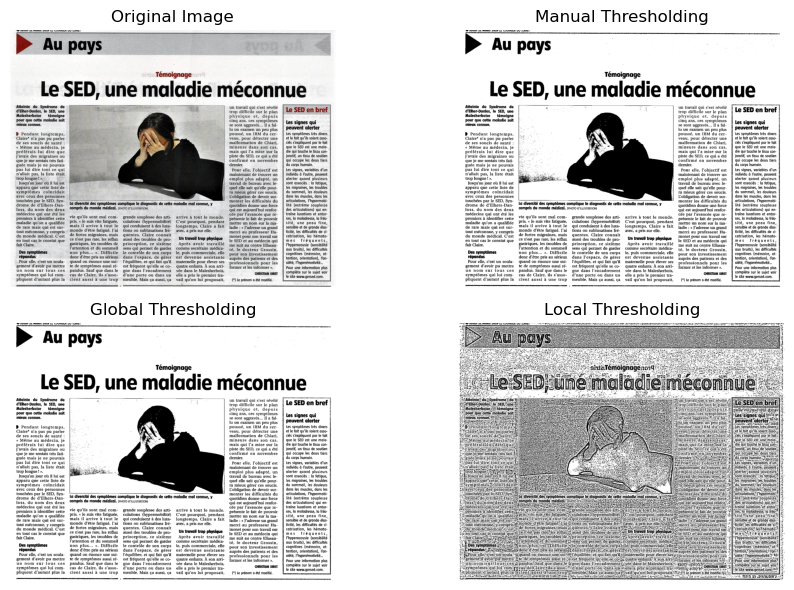

<Figure size 1000x600 with 0 Axes>

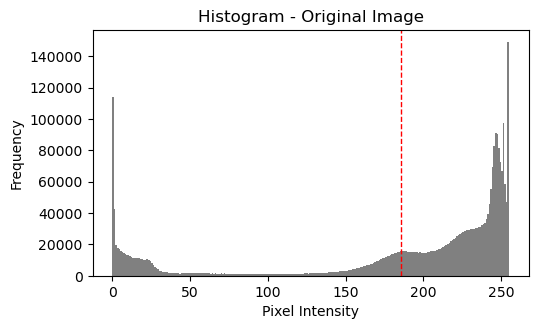

In [35]:
# Đường dẫn đến ảnh màu JPG
image_path = "Ex3.jpg"

# Đọc ảnh màu
image = cv2.imread(image_path)

# Chuyển đổi ảnh sang ảnh xám
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Ngưỡng thủ công (manual thresholding)
_, manual_threshold = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Ngưỡng toàn cục (global thresholding)
_, global_threshold = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Ngưỡng cục bộ (local thresholding)
local_threshold = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Hiển thị ảnh gốc và kết quả của 3 phương pháp
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(manual_threshold, cmap='gray')
plt.title("Manual Thresholding")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(global_threshold, cmap='gray')
plt.title("Global Thresholding")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(local_threshold, cmap='gray')
plt.title("Local Thresholding")
plt.axis('off')

plt.tight_layout()
plt.show()

# Tạo biểu đồ tần số
plt.figure(figsize=(10, 6))

# Tạo biểu đồ tần số
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.hist(gray_image.flatten(), bins=256, color='gray')
plt.axvline(gray_image.mean(), color='r', linestyle='dashed', linewidth=1)
plt.title("Histogram - Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")


plt.tight_layout()
plt.show()

## Câu 4

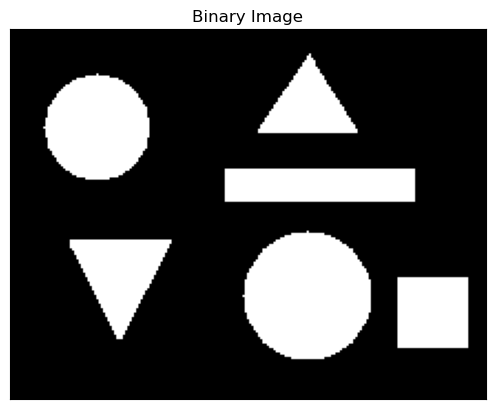

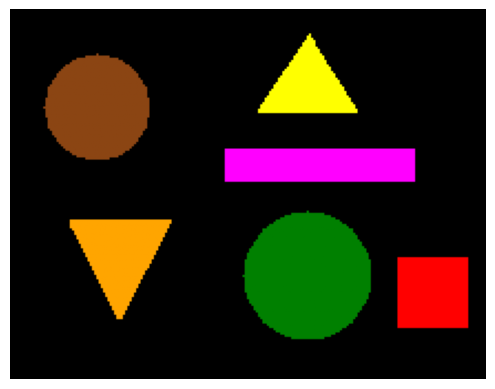

In [13]:
import cv2
from scipy import ndimage
import numpy as np
from skimage.color import label2rgb
import matplotlib.pyplot as plt

image = cv2.imread('Ex4.jpg', 0)

# Convert image to grayscale

# Binarize the grayscale image
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.xticks([])
plt.yticks([])
plt.show()
# Perform labeling
labels, num_objects = ndimage.label(binary_image, structure=np.ones((3, 3)))

# Define your desired colors
brown = [139, 69, 19]  # Brown color
green = [0, 128, 0]  # Green color
orange = [255, 165, 0]  # Orange color
yellow = [255, 255, 0]  # Yellow color
magenta = [255, 0, 255]  # Magenta color
red = [255, 0, 0]  # Red color

# Define the color mapping
cmap = np.array([yellow, brown, magenta, green, orange, red]) / 255.0

# Convert labels to RGB
rgb_label = label2rgb(labels, colors=cmap, bg_label=0)

# Display the RGB labeled image using plt
plt.imshow(rgb_label)
plt.axis('off')
plt.title('Coverted Image')
plt.show()


## Câu 5

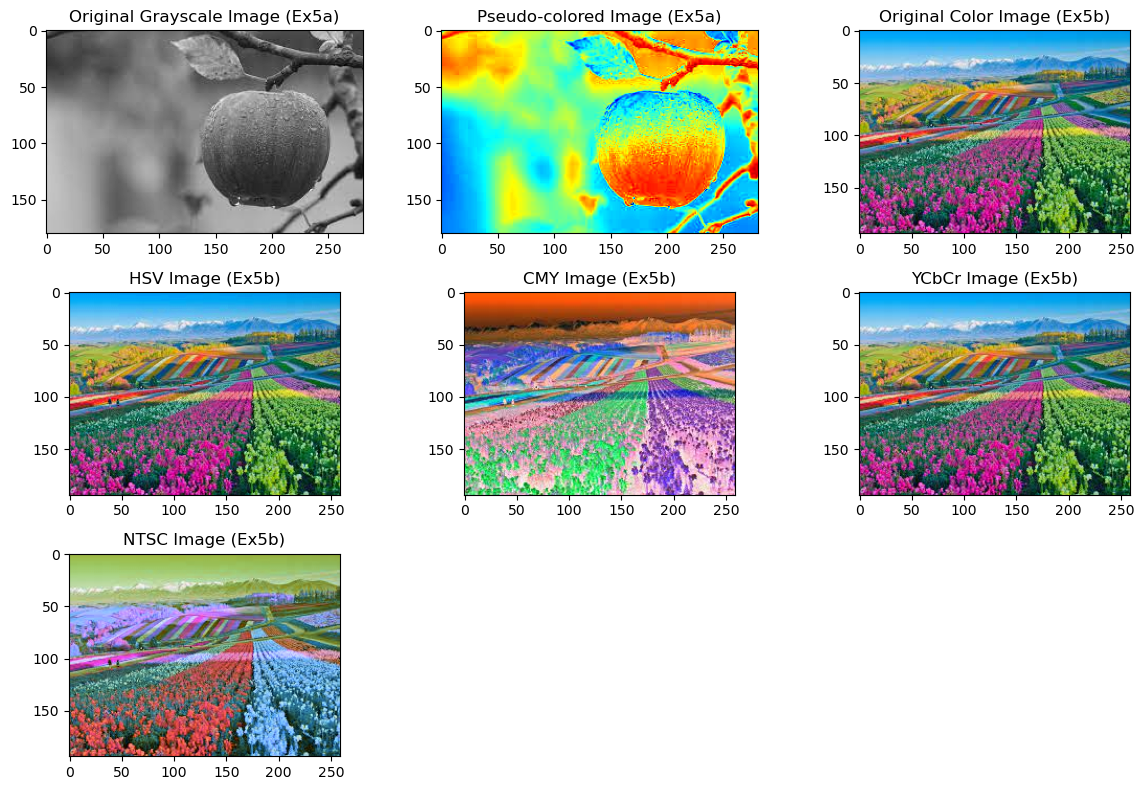

In [58]:
image_path_a = 'Ex5a.jpg'
original_img_ex5a = cv2.imread(image_path_a, cv2.IMREAD_GRAYSCALE)

image_path_b = 'Ex5b.jpg'
original_img_ex5b = cv2.imread(image_path_b, cv2.IMREAD_COLOR)

# Apply pseudo-coloring to the grayscale image (Ex5a.jpg)
pseudo_color_img_ex5a = cv2.applyColorMap(original_img_ex5a, cv2.COLORMAP_JET)

# Convert the color image (Ex5b.jpg) to different color spaces
hsv_img_ex5b = cv2.cvtColor(original_img_ex5b, cv2.COLOR_BGR2HSV)
cmy_img_ex5b = 255 - original_img_ex5b
ycbcr_img_ex5b = cv2.cvtColor(original_img_ex5b, cv2.COLOR_BGR2YCrCb)
ntsc_img_ex5b = cv2.cvtColor(original_img_ex5b, cv2.COLOR_BGR2LAB)

# Display the images
plt.figure(figsize=(12, 8))

# Original grayscale image (Ex5a.jpg)
plt.subplot(3, 3, 1)
plt.imshow(original_img_ex5a, cmap='gray')
plt.title('Original Grayscale Image (Ex5a)')

# Pseudo-colored image (Ex5a.jpg)
plt.subplot(3, 3, 2)
plt.imshow(pseudo_color_img_ex5a)
plt.title('Pseudo-colored Image (Ex5a)')

# Original color image (Ex5b.jpg)
plt.subplot(3, 3, 3)
plt.imshow(cv2.cvtColor(original_img_ex5b, cv2.COLOR_BGR2RGB))
plt.title('Original Color Image (Ex5b)')

# HSV image (Ex5b.jpg)
plt.subplot(3, 3, 4)
plt.imshow(cv2.cvtColor(hsv_img_ex5b, cv2.COLOR_HSV2RGB))
plt.title('HSV Image (Ex5b)')

# CMY image (Ex5b.jpg)
plt.subplot(3, 3, 5)
plt.imshow(cv2.cvtColor(cmy_img_ex5b, cv2.COLOR_BGR2RGB))
plt.title('CMY Image (Ex5b)')

# YCbCr image (Ex5b.jpg)
plt.subplot(3, 3, 6)
plt.imshow(cv2.cvtColor(ycbcr_img_ex5b, cv2.COLOR_YCrCb2RGB))
plt.title('YCbCr Image (Ex5b)')

# NTSC image (Ex5b.jpg)
plt.subplot(3, 3, 7)
plt.imshow(cv2.cvtColor(ntsc_img_ex5b, cv2.COLOR_YCrCb2RGB))
plt.title('NTSC Image (Ex5b)')

plt.tight_layout()
plt.show()

## Câu 6

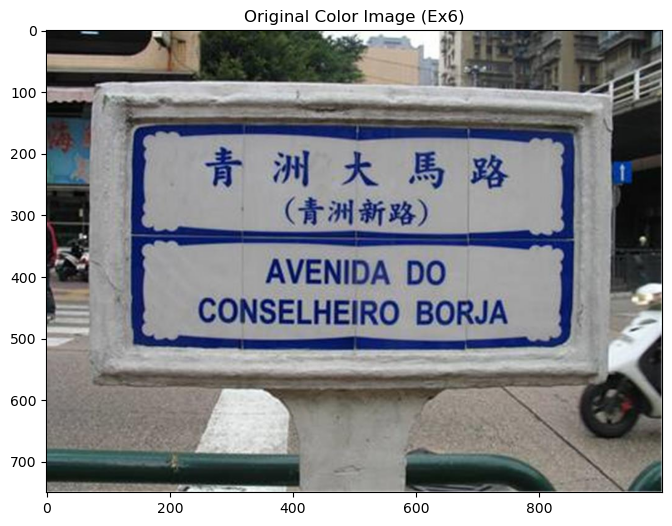

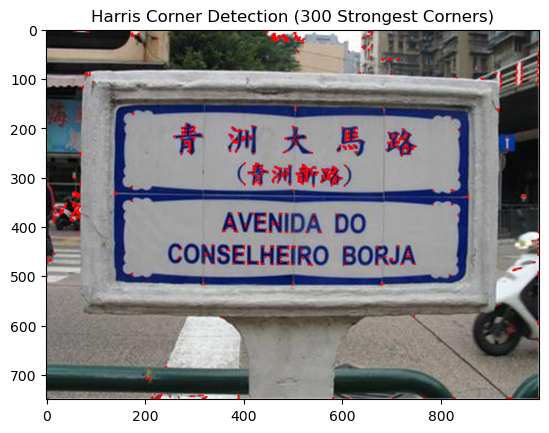

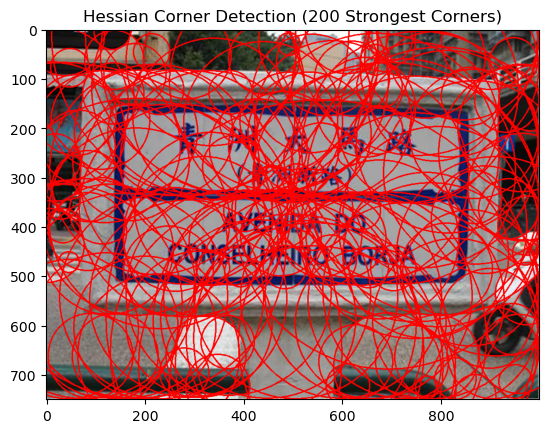

<Figure size 640x480 with 0 Axes>

In [5]:
image_path = 'Ex6.jpg'
original_img_ex6 = cv2.imread(image_path, cv2.IMREAD_COLOR)
# Convert the color image to grayscale
gray_img_ex6 = cv2.cvtColor(original_img_ex6, cv2.COLOR_BGR2GRAY)

# Harris corner detection
dst_harris = cv2.cornerHarris(gray_img_ex6, blockSize=2, ksize=3, k=0.04)
dst_harris = cv2.dilate(dst_harris, None)
corner_thresh_harris = 0.01 * dst_harris.max()
corner_img_harris = original_img_ex6.copy()
corner_img_harris[dst_harris > corner_thresh_harris] = [0, 0, 255]  # Mark corners in red

# Hessian corner detection
hessian = cv2.HoughCircles(gray_img_ex6, cv2.HOUGH_GRADIENT, dp=1, minDist=50, param1=200, param2=30, minRadius=0, maxRadius=0)
if hessian is not None:
    hessian = np.uint16(np.around(hessian))
    corner_img_hessian = original_img_ex6.copy()
    for circle in hessian[0, :200]:
        center = (circle[0], circle[1])
        cv2.circle(corner_img_hessian, center, circle[2], (0, 0, 255), 2)  # Mark circles in red

# Display the images
plt.figure(figsize=(12, 6))

# Original color image
# plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(original_img_ex6, cv2.COLOR_BGR2RGB))
plt.title('Original Color Image (Ex6)')
plt.show()
# Harris corner detection
# plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(corner_img_harris, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection (300 Strongest Corners)')
plt.show()
# Hessian corner detection
# plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(corner_img_hessian, cv2.COLOR_BGR2RGB))
plt.title('Hessian Corner Detection (200 Strongest Corners)')
plt.show()
plt.tight_layout()
plt.show()